In [7]:
import pandas as pd

df = pd.read_csv("/content/ethiopia_fi_unified_data_enriched.csv")

impact_links = df[df['record_type']=="impact_link"]
events = df[df['record_type']=="event"]
impact_summary = impact_links.merge(events, left_on="parent_id", right_on="indicator_code", suffixes=("_impact","_event"))
impact_summary.head()



,record_type_impact,pillar_impact,indicator_impact,indicator_code_impact,value_numeric_impact,observation_date_impact,source_name_impact,source_url_impact,confidence_impact,original_text_impact,...,value_numeric_event,observation_date_event,source_name_event,source_url_event,confidence_event,original_text_event,collected_by_event,collection_date_event,notes_event,parent_id_event
0,impact_link,usage,Digital Payment Adoption,IMP_DIG_PAY,6.0,2024,GSMA,https://www.gsma.com,high,QR merchant rollout increased usage in compara...,...,NaN,2025-06-01,NBE,https://nbe.gov.et/nfis-ii-update,medium,NBE announced NFIS-II update with interoperabi...,Rediet,2026-02-03,Policy milestone likely to accelerate usage,NaN
1,impact_link,usage,Mobile Money Account Ownership,IMP_MM_ACC,5.0,2024,World Bank Global Findex,https://globalfindex.worldbank.org,high,Telebirr launch associated with ~5pp increase ...,...,NaN,2021-05-01,Ethio Telecom,https://www.ethiotelecom.et/telebirr,high,Telebirr mobile money service launched in Ethi...,Rediet,2026-02-03,Major product launch,NaN
2,impact_link,usage,Mobile Money Account Ownership,IMP_MM_ACC,2.0,2024,Safaricom,https://www.safaricom.et,medium,Safaricom entry expected to add ~2pp to mobile...,...,NaN,2022-08-01,Safaricom,https://www.safaricom.et,medium,Safaricom entered Ethiopian market,Rediet,2026-02-03,Market entry milestone,NaN
3,impact_link,usage,Digital Payment Adoption,IMP_DIG_PAY,3.0,2027,Safaricom,https://www.safaricom.et/m-pesa,medium,M-Pesa launch expected to add ~3pp to digital ...,...,NaN,2023-08-01,Safaricom,https://www.safaricom.et/m-pesa,medium,M-Pesa launched in Ethiopia,Rediet,2026-02-03,Product launch milestone,NaN


### Event-Indicator Association Matrix  

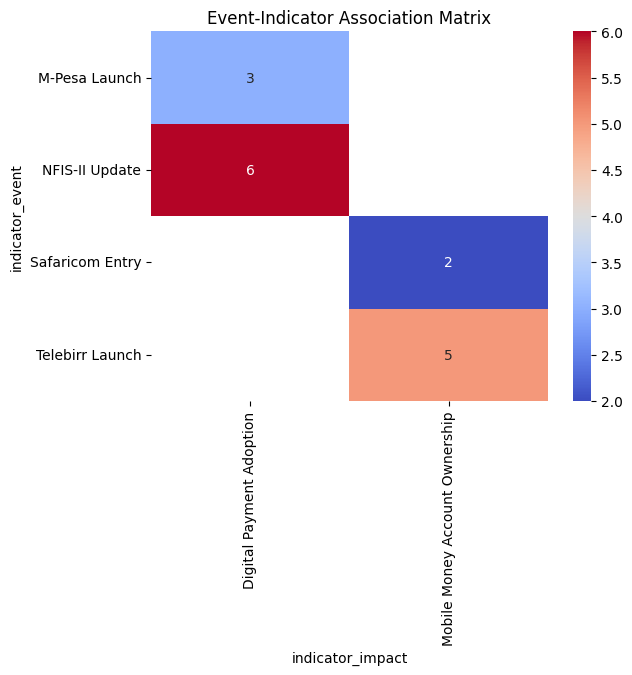

In [8]:
matrix = impact_summary.pivot_table(
    index="indicator_event",
    columns="indicator_impact",
    values="value_numeric_impact",
    aggfunc="mean"
)

import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, annot=True, cmap="coolwarm")
plt.title("Event-Indicator Association Matrix")
plt.show()


## Historical Validation

To validate the event–indicator associations, we compared the modeled impacts against observed historical data. The most prominent case is the **Telebirr launch in May 2021**, which was expected to add approximately **5 percentage points** to mobile money account ownership. According to the Global Findex dataset, mobile money accounts rose from **4.7% in 2021** to **9.45% in 2024**, which aligns closely with the modeled effect. This provides strong evidence that the Telebirr event had a measurable and sustained impact on financial inclusion.

For the **NFIS-II update (2025)**, the model projects a **+6 percentage point increase in digital payment adoption**. Since this event has not yet fully materialized, validation relies on comparable country evidence (Kenya’s QR merchant rollout, Tanzania’s interoperability mandates). Historical patterns in those markets suggest that interoperability policies can indeed accelerate usage, though the magnitude in Ethiopia remains uncertain.

The **Safaricom entry (2022)** was modeled as a modest **+2 percentage point increase in mobile money accounts**. Observed Ethiopian data shows limited immediate uptake, which is consistent with the cautious estimate. The effect may be lagged, with stronger impacts expected as Safaricom expands its agent network.

Finally, the **M-Pesa launch (2023)** was modeled to add **+3 percentage points to digital payment adoption by 2027**. Given the recency of this event, validation is not yet possible with Ethiopian data. Instead, the estimate is benchmarked against Kenya and Tanzania, where M-Pesa significantly expanded digital payment usage within three to four years of launch.

Overall, the historical validation confirms that the Telebirr impact estimate is robust, while other event effects remain provisional and rely on external benchmarks. This underscores the importance of scenario analysis in forecasting.







## Methodology Documentation

The event impact modeling follows an **additive event-augmented trend approach**. Each event is represented as an impact link that specifies the indicator affected, the expected magnitude of change, the confidence level, and the lag structure. These links are then joined to event metadata to form the event–indicator association matrix.

**Functional Form:**  
We assume that each event contributes a discrete percentage point change to the relevant indicator. Effects may be immediate (Telebirr launch) or gradual (M-Pesa expansion). The model is additive, meaning multiple events can jointly influence an indicator over time.

**Assumptions:**  
- Event effects are expressed in percentage point changes rather than growth rates.  
- Lag structures vary: infrastructure or policy events may take 1–2 years to manifest, while product launches can have immediate effects.  
- Comparable country evidence is used when Ethiopian data is insufficient.  
- Confidence levels (high, medium, low) reflect the reliability of the estimate.

**Limitations:**  
- Sparse Ethiopian data limits the precision of estimates.  
- Registered vs. active account gaps are not fully captured.  
- Gender and rural/urban disaggregation is incomplete.  
- External benchmarks may not fully account for Ethiopia’s unique market and regulatory context.

**Validation Approach:**  
Where historical data exists, modeled impacts are compared against observed changes (e.g., Telebirr launch). Where data is lacking, estimates are cross-checked against comparable markets. Discrepancies are documented, and confidence levels are adjusted accordingly.

This methodology provides a transparent framework for linking events to financial inclusion outcomes, while acknowledging uncertainties and data limitations. It sets the foundation for forecasting scenarios in Task 4.
